## **Inteligencia Artificial y Aprendizaje Automático**

## **Carlos Alvarez**

### Prof Luis Eduardo Falcón Morales

### **Campañas publicitarias en redes sociales - Modelos de Regresión**


### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al., que deberás descargar para contestar varias de las preguntas de esta actividad:**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [1]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



### ++++++++ Inicia la sección de agregar texto: +++++++++++

El método de curvas de aprendizaje es un método gráfico que permite identificar cómo se comporta el modelo en términos de sobreentrenamiento o subentrenamiento cuando se somete a diferentes tamaños de muestra, diferentes ciclos de entrenamiento o diferentes valores de parámetros de penalización. Esto se logra al identificar en el gráfico los tamaños de los errores de sesgo, varianza y ruido.

El sobreentrenamienbto se identifica cuando existe sesgo bajo y varianza alta, por el otro lado, sesgo alto con varianza baja indica un modelo subentrenado.


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al., contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


### ++++++++ Inicia la sección de agregar texto: +++++++++++

El articulo propone una metodología para comprobar la influencia de 7 variables de entrada en cuanto a las métricas de performance para publicaciones realizadas en paginas de facebook de empresas. El estudio también contempla conocer que variables impactan mas el permormance de las publicaciones y en que forma.

Esto mediante la elaboración de un modelo y obteniendo los errores de predicción del mismo.


### ++++++++ Termina la sección de agregar texto. +++++++++++


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


*   Category: Indica si el post será relacionado a una oferta, producto o no relacionado con alguna marca.

*   Page total likes: Numero de personas que dieron like a la página.

*   Type: Tipo de contenido(Imagen, Video, Status, etc.)

*   Post Month: Mes en que se realizó la publicación

*   Post Hour: Hora en que se realizó la publicación

*   Post Weekday: Dia de la semana en la que se realizó la publicación

*   Paid: Si la compaía realizó algún pago a facebook por la publicación.

*   Lifetime post consumers: Variable de salida que indica la cantidad de      personas que dieron click en cualquier parte del post.

### ++++++++ Termina la sección de agregar texto. +++++++++++

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cargamos los datos:

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNA_TEC_DE_MONTERREY/Inteligencia Artificial y Aprendizaje Automatico_TC4030/Modulo 3/Actividad 6/dataset_Facebook.csv', sep=';', header='infer')

# Separamos los datos de entrada y la variable de salida:
X = data.iloc[:,0:7]   # Las primeras 7 columnas son las variables de entrada.
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de reporte.

# Renombramos los niveles de "Type", para tener solo valores numéricos en el DataFrame:
X['Type'] = X['Type'].map({'Photo':1, 'Status':2, 'Link':3, 'Video':4})

# Particionamos en Train, Validation y Test en 60-20-20:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (300, 7) (300, 1)
Val: (100, 7) (100, 1)
Test: (100, 7) (100, 1)


In [4]:
Xtrain.head() # Nuestros datos de entrada

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
92,137059,1,3,11,1,3,0.0
45,138353,3,1,12,4,3,1.0
313,124940,1,3,6,7,3,1.0
46,138353,2,1,12,3,11,0.0
185,134879,1,1,9,1,10,0.0


In [5]:
Xtrain.describe().T   # Veamos alguna descripción como datos numéricos del conjunto de entrenamiento.
                      # En particular, las desviaciones estándar son muestrales.

,count,mean,std,min,25%,50%,75%,max
Page total likes,300.0,123511.376667,16211.773474,81370.0,113028.00,130195.5,136393.0,139441.0
Type,300.0,1.216667,0.580959,1.0,1.00,1.0,1.0,4.0
Category,300.0,1.896667,0.849546,1.0,1.00,2.0,3.0,3.0
Post Month,300.0,7.106667,3.306316,1.0,4.00,7.0,10.0,12.0
Post Weekday,300.0,4.180000,2.015226,1.0,2.75,4.0,6.0,7.0
Post Hour,300.0,7.546667,4.348662,1.0,3.00,8.0,11.0,22.0
Paid,299.0,0.290970,0.454971,0.0,0.00,0.0,1.0,1.0


In [6]:
ytrain.describe().T   # lo mismo para la variable de salida.

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,300.0,827.986667,1009.102992,9.0,321.25,543.5,1008.75,11328.0


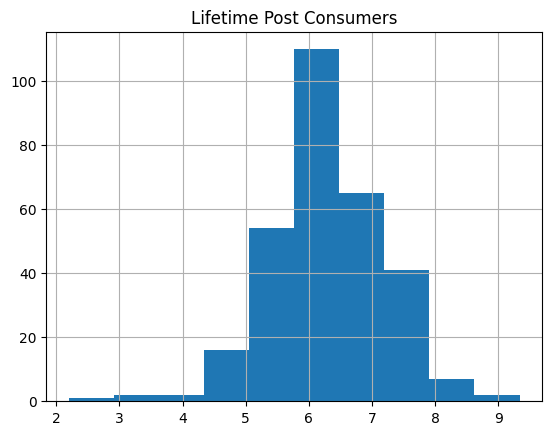

In [7]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [8]:
# y procedemos de la misma manera con Val y test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [9]:
# Apliaremos lo mínimo de transformaciones, en particular para datos perdidos:
num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')), ('normalization', MinMaxScaler(feature_range=(1, 5))) #TUVE QUE AGREGAR ESCALAMIENTO EN ESTA PARTE PARA HACER CONVERGER EL MODELO MLP!
                             ])
num_pipe_nombres = [0]   # ['Page total likes']


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4,5]   # ['Post Month', 'Post Weekday', 'Post Hour']

# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,6]   # ['Type', 'Category', 'Paid']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres)
                                                        ],
                                        remainder='passthrough')


In [10]:
# Solo para saber la nueva cantidad de columnas después de las trasnformaciones:

XtrainT = columnasTransformer.fit_transform(Xtrain)  # Ajustamos con Train...
print('Variables de entrada original:', Xtrain.shape)
print('Variables de entrada transformadas:', XtrainT.shape)

Variables de entrada original: (300, 7)
Variables de entrada transformadas: (300, 11)


In [11]:
# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std(ddof=1))      # Usemos la desviación estándar muestral ajustando.
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std(ddof=1))        # los grados de libertad.

Desv-Est y-original: 1009.103
Desv-Est y-logaritmo: 0.907


#### **NOTA:**
#### **Estricamente, desde el punto de vista matemático las desviaciones estándar que uno calcula deben ser las muestrales, es decir, std(ddof=1). Sin embargo, en la práctica es muy común usar la función con su valor predeterminado que es ddof=0 y que se traduce a calcular la desviación estándar poblacional. Repito, en la práctica suele pasarse por alto este ajuste porque cuando se tienen datos de miles o más regitros, la diferencia entre el resultado problacional y el muestral es mínima. En esta actividad lo pongo solamente para recordarlo y en dado caso cuando tengas menos de 100 registros sí hacer este ajuste, porque la diferencia entre ambos ya podría ser importante.**

In [12]:
# Como se va a utilizar Validación-Cruzada, concatenamos los conjuntos de entrenamiento y validación
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:

Xtrainval = np.concatenate((Xtrain, Xval), axis=0)
ytrainvallog = np.concatenate((ytrainlog, yvallog), axis=0)

## **Ejercicio 3**


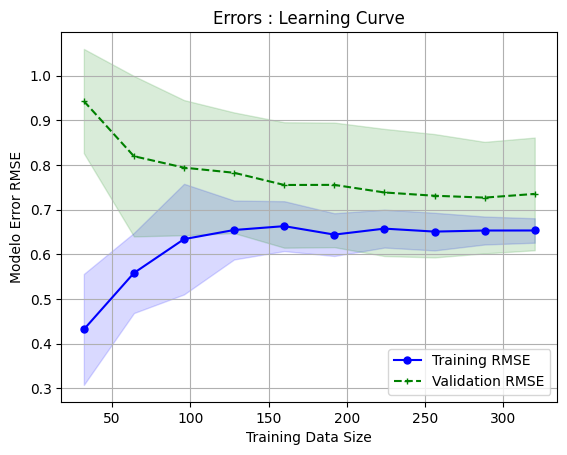

In [13]:
# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

#criterion{“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}, default=”squared_error”

elmodelo_RF = RandomForestRegressor(max_depth=3, random_state=45, n_jobs=-1, criterion='friedman_mse')

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainvallog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)   # aquí también hacemos el ajuste de la desviación estándar muestral.
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Errors : Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Modelo Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [14]:
# Una vez que verifiquemos que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de tus mejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(max_depth=3, random_state=45, n_jobs=-1, criterion='friedman_mse')

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest: 0.729


## **Ejercicio 4**

### **Repite el mismo proceso del Ejercicio 3 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenaos, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

In [15]:
# Incluye a continuación las celdas y líneas de código que consideres necesarias para
# responder el Ejercicio 4.

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

modelos = {}

# #XGBoost
xgBoost = XGBRegressor(n_estimators=200, booster='gbtree', max_depth=4, learning_rate=0.005, n_jobs=-1, random_state=5, reg_alpha=0.1, reg_lambda=0.1)
#xgBoost = XGBRegressor(
modelos['XGBoost'] = xgBoost

#Support Vector Machine
svm = SVR(kernel='poly', gamma= 0.08, C=0.5, degree=3, epsilon=0.01, max_iter=-1, coef0=0.0)
modelos['SVM'] = svm

# MLP Regressor
mlpRegressor = MLPRegressor(hidden_layer_sizes=(100,),
                             solver='sgd',
                             activation='tanh',
                             max_iter=5000,
                             alpha=0.0001,
                             batch_size='auto',
                             learning_rate='adaptive',
                             learning_rate_init=0.005,
                             random_state=1)
modelos['MLP'] = mlpRegressor

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

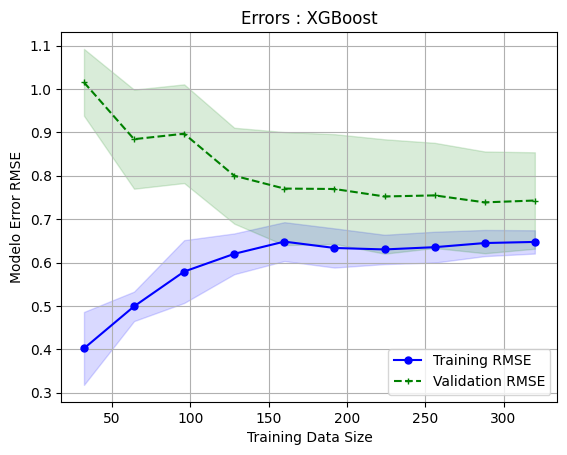

Error XGBoost(Test): 0.740


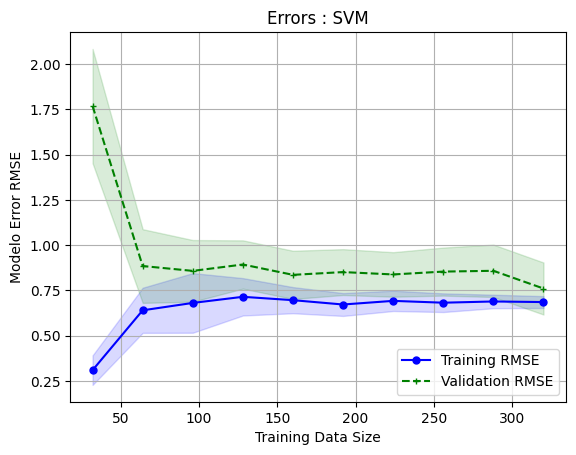

Error SVM(Test): 0.765


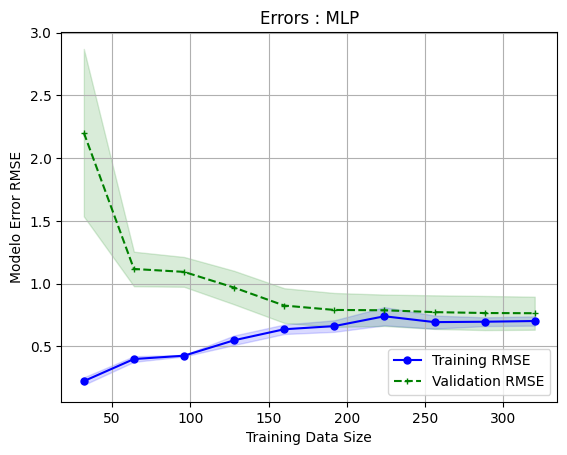

Error MLP(Test): 0.723


In [17]:
#Impresion de las curvas de aprendizaje de diferentes nmodelos
for nombre_modelo, modelo in modelos.items():
    mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo)])

    train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                            X=Xtrainval,
                                                            y=np.ravel(ytrainvallog),
                                                            cv=5,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='neg_mean_squared_error',  # error MSE
                                                            n_jobs=-1)

    rmse_train_scores = np.sqrt(-train_scores)
    rmse_val_scores = np.sqrt(-val_scores)

    train_mean = np.mean(rmse_train_scores, axis=1)
    train_std = np.std(rmse_train_scores, axis=1, ddof=1)
    val_mean = np.mean(rmse_val_scores, axis=1)
    val_std = np.std(rmse_val_scores, axis=1, ddof=1)

    fig, ax = plt.subplots()  # Crear una figura y un eje

    ax.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
    ax.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

    ax.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
    ax.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

    ax.set_title('Errors : {}'.format(nombre_modelo))
    ax.set_xlabel('Training Data Size')
    ax.set_ylabel('Modelo Error RMSE')
    ax.grid()
    ax.legend(loc='lower right')

    # Ajustar el espacio vertical entre subplots
    plt.subplots_adjust(hspace=30)  # Cambia el valor según sea necesario

    plt.show()
    #Imprime los valores de RMSE para cada Modelo
    mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))
    yhattest_model = mipipe.predict(Xtest)

    print(f'Error {nombre_modelo}(Test): {np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_model)):.3f}')


# **Ejercicio 5**

### **Incluye tus conclusiones finales de la Actividad.**
### **En particular indica cuál consideras que fue el mejor modelo obtenido.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

La construcción de las curvas me ayudó mucho a comprender más acerca de cómo medir el desempeño de los modelos con base en número de iteraciones o cantidad de muestras.

Es una métrica importante que ayuda a comprender si el aprendizaje se está llevando a cabo de manera correcta ya que si no existiera una evolución de las métricas respecto al número de muestras o ciclos de entrenamiento sería un indicativo de que algo está fallando en el proceso de aprendizaje.

En este ejercicio noté que es mucho más fácil entrenar un modelo de randomforest que uno de SVM o MLP ya que ambos requieren mayor costo de cómputo y configuración de hiperparametros más precisa.

En mi ejercicio los mejores resultados se obtuvieron en el MLP con 0.723 de RMSE, mientras que en Random Forest se obtuvo 0.729.

Algo muy importante que tengo que comentar es que el modelo MLP es el más sensible a escalamiento de los datos, ya que al inicio del ejercicio era imposible de hacer converger el modelo, la curva de validación era inmutable y se mantenía recta en el nivel RMSE de 0.9, por lo que al escalar los datos en la parte de preprocesamiento se notó de inmediato la mejora y se pudo llevar en el modelo MLP las curvas de training y validación a un nivel cercano a 0.75.


### ++++++++ Termina la sección de agregar texto. +++++++++++

>> **Fin de la Actividad de la Semana 7**